# Part 1: Using Gradient Descent to Solve Linear Regression

In this part of the lab, you will be requested to solve the linear regression problem using gradient descent. This means you will not use the closed form solution of linear regression to find the model's parameters, but gradient descent. 

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

For this exercise we will use some dummy data. 

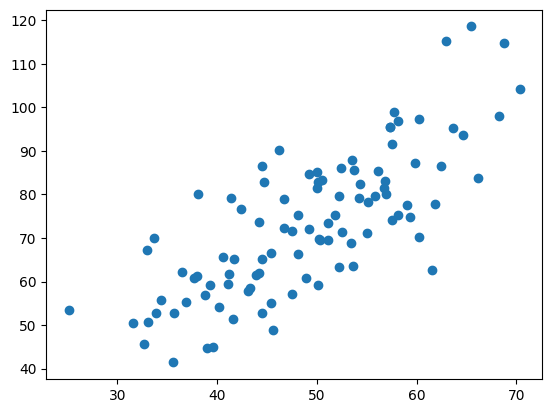

In [2]:
# We will use some dummy data
data = pd.read_csv('data/data.csv')
X = data.iloc[:, 0]
Y = data.iloc[:, 1]
plt.scatter(X, Y)
plt.show()

#Use a friendly format for X and y
X = X.to_numpy().reshape(-1,1)
y = Y.to_numpy().reshape(-1,1)


The data seems to follow a linear model of order one. Hence, we will try to fit the following linear regression model:
\begin{equation}
\hat{y} = \mathbf{w}^{T}\mathbf{x} + w_0
\end{equation}

Let us recall that for linear regression, we use the sum of squares loss function:
\begin{equation}
\mathcal{L} = \dfrac{1}{N}\sum_{i=1}^N(y_i - \hat{y})^2
\end{equation}

### Exercise 1: Implement the gradient descent function
You will need to complete the gradient descent function for linear regression. 

In [3]:
def gradient_descent(alpha, epochs, epsilon, X, y):
    '''
    Performs gradient descent
    Inputs:
    alpha - learning rate
    epochs - number of iterations
    epsilon - threshold to stop iterations
    X - Input matrix of size N x (D + 1)
    y - Output vector of size N x 1

    Outputs:
    weights - Parameters vector of size (D + 1) x 1
    '''
  
    #Initialize weights
    weights = np.zeros((X.shape[1]+1,1))
    
    #Adds a one to the matrix so it copes with w_0
    X = PolynomialFeatures(1).fit_transform(X)
    N = len(X)
    inv_N = float(1/N)
    prev_gradient = 0
    for e in range(epochs):
        
        #1) Estimate y_hat
        y_hat = np.dot(X,weights)
        
        #2) Estimate the gradient
        #gradient = (2*(y-weights.T*X)*X).sum()
        gradient = 2 * inv_N * np.sum((y - y_hat) * X)
        gradient_norm = np.linalg.norm(gradient)
        
        print ('Epoch ', e, ' weights: ', weights, 'gradient_norm: ', gradient_norm) 
        
        #3) Check the stopping criterion
        if np.abs(gradient_norm - prev_gradient) <= epsilon:
            break
            
        #4) Update weights
        weights = weights + alpha*inv_N*gradient
        
        #5) Update previous gradient
        prev_gradient = gradient_norm
        
    return weights
    

Now, test your implementation:

In [4]:
alpha = 0.0001  # The learning Rate
epochs = 1000  # The number of iterations to perform gradient descent
weights = gradient_descent(alpha, epochs, 0.00001, X, y)

Epoch  0  weights:  [[0.]
 [0.]] gradient_norm:  7570.634235910889
Epoch  1  weights:  [[0.00764711]
 [0.00764711]] gradient_norm:  7530.797393250922
Epoch  2  weights:  [[0.01525397]
 [0.01525397]] gradient_norm:  7491.170172926896
Epoch  3  weights:  [[0.02282081]
 [0.02282081]] gradient_norm:  7451.75147190151
Epoch  4  weights:  [[0.03034783]
 [0.03034783]] gradient_norm:  7412.540192941655
Epoch  5  weights:  [[0.03783525]
 [0.03783525]] gradient_norm:  7373.535244587894
Epoch  6  weights:  [[0.04528326]
 [0.04528326]] gradient_norm:  7334.735541124076
Epoch  7  weights:  [[0.05269209]
 [0.05269209]] gradient_norm:  7296.140002547103
Epoch  8  weights:  [[0.06006192]
 [0.06006192]] gradient_norm:  7257.747554536886
Epoch  9  weights:  [[0.06739298]
 [0.06739298]] gradient_norm:  7219.557128426429
Epoch  10  weights:  [[0.07468546]
 [0.07468546]] gradient_norm:  7181.567661172081
Epoch  11  weights:  [[0.08193957]
 [0.08193957]] gradient_norm:  7143.778095323955
Epoch  12  weights:

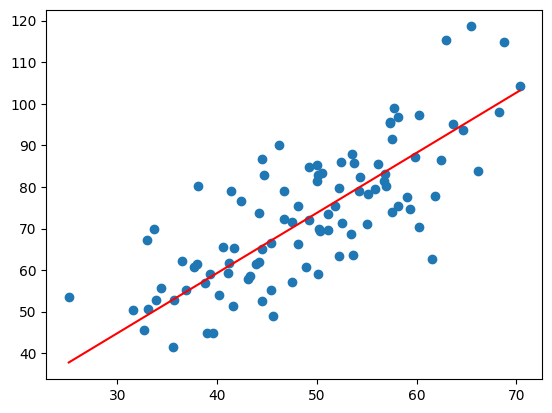

In [5]:
y_hat = np.dot(PolynomialFeatures(1).fit_transform(X),weights)
plt.scatter(X, Y)
plt.plot([min(X), max(X)], [min(y_hat), max(y_hat)], color='red') # predicted
plt.show()

### Question 1: Stopping criterion
Explain what is being done at steps 3 and 5 of the code.

#Your answer
- At step 3 of the code we basically check the stopping criteria. 
It can usually be either the a maximum number of iterations or a condition on the norm of the gradient.
From what we've seen in class, a good stopping criteria is checking that the norm of the gradient at the current step is less then a (small) stopping tolerance epsilon. That means that the gradient is almost 0, therfore we are in a local minimum (global if the function is convex).    
In this case, it checks if the difference between the norm of the gradient at this step and the previous one is less than the stopping tolerance. Which seems to us a little bit odd because it does not detect a local minimum? But it checks only if the slope is almost constant between the two steps, and does not detect if we are in a minimum. 


- At step 5 of the code we update the value of the previous gradient variable for the next step according to the new parameters that we just found.

### Exercise 2: Hyper-parameters
Play a bit with the learning rate (alpha), the number of epochs and the stopping criterion. What can you say about the influence these have on your results? Make sure you document all your experiments.

Epoch  0  weights:  [[0.]
 [0.]] gradient_norm:  7570.634235910889
Epoch  1  weights:  [[0.07647105]
 [0.07647105]] gradient_norm:  7172.265809311204
Epoch  2  weights:  [[0.14891818]
 [0.14891818]] gradient_norm:  6794.859616305995
Epoch  3  weights:  [[0.21755313]
 [0.21755313]] gradient_norm:  6437.312619586255
Epoch  4  weights:  [[0.28257649]
 [0.28257649]] gradient_norm:  6098.57982390704
Epoch  5  weights:  [[0.3441783]
 [0.3441783]] gradient_norm:  5777.671221901367
Epoch  6  weights:  [[0.40253862]
 [0.40253862]] gradient_norm:  5473.648900606089
Epoch  7  weights:  [[0.457828]
 [0.457828]] gradient_norm:  5185.624300242974
Epoch  8  weights:  [[0.51020805]
 [0.51020805]] gradient_norm:  4912.755617243346
Epoch  9  weights:  [[0.55983184]
 [0.55983184]] gradient_norm:  4654.245343926129
Epoch  10  weights:  [[0.60684442]
 [0.60684442]] gradient_norm:  4409.337937638565
Epoch  11  weights:  [[0.65138319]
 [0.65138319]] gradient_norm:  4177.317612547263
Epoch  12  weights:  [[0.

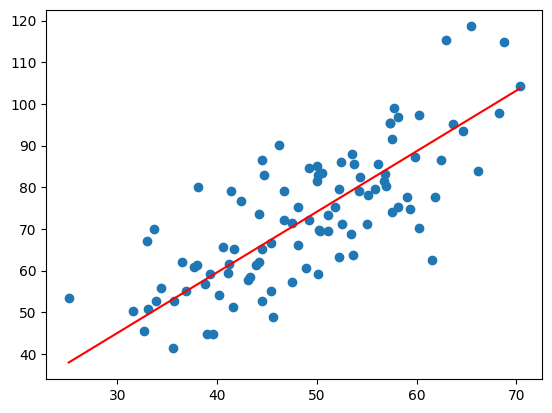

In [6]:
# Your code and answer here
alpha = 0.001  # The learning Rate
epochs = 1000  # The number of iterations to perform gradient descent
epsilon = 0.00001
weights = gradient_descent(alpha, epochs, epsilon, X, y)

y_hat = np.dot(PolynomialFeatures(1).fit_transform(X),weights)
plt.scatter(X, Y)
plt.plot([min(X), max(X)], [min(y_hat), max(y_hat)], color='red') # predicted
plt.show()

INCREASING ALPHA
Just by increasing alpha by one order of magnitude the function starts bouncing between very big and very small value until it reaches the overflow. we can notice that these represents a very big step value from the info printed by the epoch. 
In this case it is not possible to find a solution because the value of w does not converge. 

Let's try again but with a smaller value of alpha.

Epoch  0  weights:  [[0.]
 [0.]] gradient_norm:  7570.634235910889
Epoch  1  weights:  [[7.64710529e-06]
 [7.64710529e-06]] gradient_norm:  7570.59439906823
Epoch  2  weights:  [[1.52941703e-05]
 [1.52941703e-05]] gradient_norm:  7570.554562435192
Epoch  3  weights:  [[2.29411951e-05]
 [2.29411951e-05]] gradient_norm:  7570.514726011777
Epoch  4  weights:  [[3.05881797e-05]
 [3.05881797e-05]] gradient_norm:  7570.47488979798
Epoch  5  weights:  [[3.82351241e-05]
 [3.82351241e-05]] gradient_norm:  7570.435053793803
Epoch  6  weights:  [[4.58820281e-05]
 [4.58820281e-05]] gradient_norm:  7570.395217999243
Epoch  7  weights:  [[5.3528892e-05]
 [5.3528892e-05]] gradient_norm:  7570.3553824143
Epoch  8  weights:  [[6.11757156e-05]
 [6.11757156e-05]] gradient_norm:  7570.315547038973
Epoch  9  weights:  [[6.8822499e-05]
 [6.8822499e-05]] gradient_norm:  7570.2757118732625
Epoch  10  weights:  [[7.64692421e-05]
 [7.64692421e-05]] gradient_norm:  7570.235876917162
Epoch  11  weights:  [[8.4115

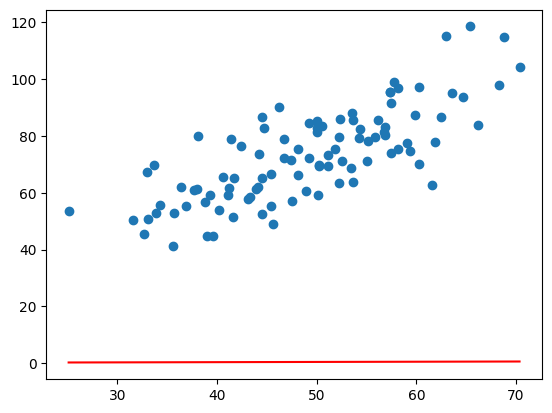

In [7]:
# Your code and answer here
alpha = 0.0000001  # The learning Rate
epochs = 1000  # The number of iterations to perform gradient descent
epsilon = 0.00001
weights = gradient_descent(alpha, epochs, epsilon, X, y)

y_hat = np.dot(PolynomialFeatures(1).fit_transform(X),weights)
plt.scatter(X, Y)
plt.plot([min(X), max(X)], [min(y_hat), max(y_hat)], color='red') # predicted
plt.show()

DECREASING ALPHA 

In this case the learning rate is very slow. 
In every epoch the slope is modified of a very little factor, so our number of epoch is not enough anymore to get a correct model. 

Let's add some more epochs

Epoch  0  weights:  [[0.]
 [0.]] gradient_norm:  7570.634235910889
Epoch  1  weights:  [[7.64710529e-06]
 [7.64710529e-06]] gradient_norm:  7570.59439906823
Epoch  2  weights:  [[1.52941703e-05]
 [1.52941703e-05]] gradient_norm:  7570.554562435192
Epoch  3  weights:  [[2.29411951e-05]
 [2.29411951e-05]] gradient_norm:  7570.514726011777
Epoch  4  weights:  [[3.05881797e-05]
 [3.05881797e-05]] gradient_norm:  7570.47488979798
Epoch  5  weights:  [[3.82351241e-05]
 [3.82351241e-05]] gradient_norm:  7570.435053793803
Epoch  6  weights:  [[4.58820281e-05]
 [4.58820281e-05]] gradient_norm:  7570.395217999243
Epoch  7  weights:  [[5.3528892e-05]
 [5.3528892e-05]] gradient_norm:  7570.3553824143
Epoch  8  weights:  [[6.11757156e-05]
 [6.11757156e-05]] gradient_norm:  7570.315547038973
Epoch  9  weights:  [[6.8822499e-05]
 [6.8822499e-05]] gradient_norm:  7570.2757118732625
Epoch  10  weights:  [[7.64692421e-05]
 [7.64692421e-05]] gradient_norm:  7570.235876917162
Epoch  11  weights:  [[8.4115

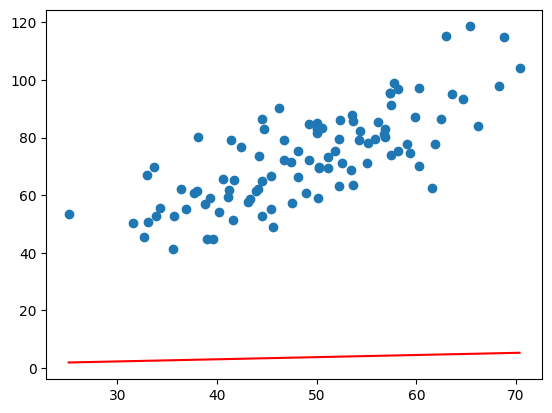

In [8]:
# Your code and answer here
alpha = 0.0000001  # The learning Rate
epochs = 10000  # The number of iterations to perform gradient descent
epsilon = 0.00001
weights = gradient_descent(alpha, epochs, epsilon, X, y)

y_hat = np.dot(PolynomialFeatures(1).fit_transform(X),weights)
plt.scatter(X, Y)
plt.plot([min(X), max(X)], [min(y_hat), max(y_hat)], color='red') # predicted
plt.show()

INCREASING EPOCH

With the same (slow) learning rate it is not possible to reach the same solution as before even with 10k iterations.
Increasing more the number of epochs enables to find the same solution as before. The solution change until the criteria met to stop is the chosen stopping criteria and not the number of epochs. 

Let's try to change epsilon now. 

Epoch  0  weights:  [[0.]
 [0.]] gradient_norm:  7570.634235910889
Epoch  1  weights:  [[0.00764711]
 [0.00764711]] gradient_norm:  7530.797393250922
Epoch  2  weights:  [[0.01525397]
 [0.01525397]] gradient_norm:  7491.170172926896
Epoch  3  weights:  [[0.02282081]
 [0.02282081]] gradient_norm:  7451.75147190151
Epoch  4  weights:  [[0.03034783]
 [0.03034783]] gradient_norm:  7412.540192941655
Epoch  5  weights:  [[0.03783525]
 [0.03783525]] gradient_norm:  7373.535244587894
Epoch  6  weights:  [[0.04528326]
 [0.04528326]] gradient_norm:  7334.735541124076
Epoch  7  weights:  [[0.05269209]
 [0.05269209]] gradient_norm:  7296.140002547103
Epoch  8  weights:  [[0.06006192]
 [0.06006192]] gradient_norm:  7257.747554536886
Epoch  9  weights:  [[0.06739298]
 [0.06739298]] gradient_norm:  7219.557128426429
Epoch  10  weights:  [[0.07468546]
 [0.07468546]] gradient_norm:  7181.567661172081
Epoch  11  weights:  [[0.08193957]
 [0.08193957]] gradient_norm:  7143.778095323955
Epoch  12  weights:

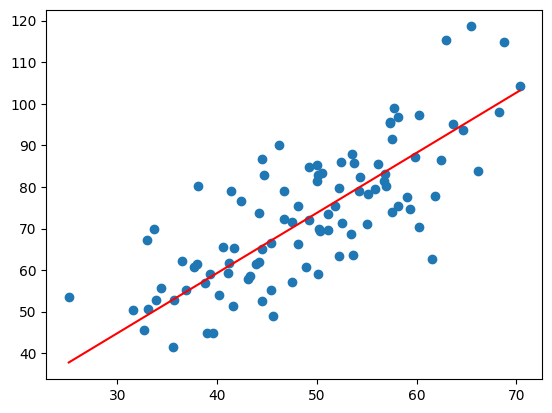

In [9]:
# Your code and answer here
alpha = 0.0001  # The learning Rate
epochs = 1000  # The number of iterations to perform gradient descent
epsilon = 0.001
weights = gradient_descent(alpha, epochs, epsilon, X, y)

y_hat = np.dot(PolynomialFeatures(1).fit_transform(X),weights)
plt.scatter(X, Y)
plt.plot([min(X), max(X)], [min(y_hat), max(y_hat)], color='red') # predicted
plt.show()

INCREASING EPSILON

As expected by increasing this value by one order of magnitude the algorithm stop in fewer epochs than before, since it is easier to find a delta(norm) < epsilon. 

Let's see what happens if deacrease it instead:

Epoch  0  weights:  [[0.]
 [0.]] gradient_norm:  7570.634235910889
Epoch  1  weights:  [[0.00764711]
 [0.00764711]] gradient_norm:  7530.797393250922
Epoch  2  weights:  [[0.01525397]
 [0.01525397]] gradient_norm:  7491.170172926896
Epoch  3  weights:  [[0.02282081]
 [0.02282081]] gradient_norm:  7451.75147190151
Epoch  4  weights:  [[0.03034783]
 [0.03034783]] gradient_norm:  7412.540192941655
Epoch  5  weights:  [[0.03783525]
 [0.03783525]] gradient_norm:  7373.535244587894
Epoch  6  weights:  [[0.04528326]
 [0.04528326]] gradient_norm:  7334.735541124076
Epoch  7  weights:  [[0.05269209]
 [0.05269209]] gradient_norm:  7296.140002547103
Epoch  8  weights:  [[0.06006192]
 [0.06006192]] gradient_norm:  7257.747554536886
Epoch  9  weights:  [[0.06739298]
 [0.06739298]] gradient_norm:  7219.557128426429
Epoch  10  weights:  [[0.07468546]
 [0.07468546]] gradient_norm:  7181.567661172081
Epoch  11  weights:  [[0.08193957]
 [0.08193957]] gradient_norm:  7143.778095323955
Epoch  12  weights:

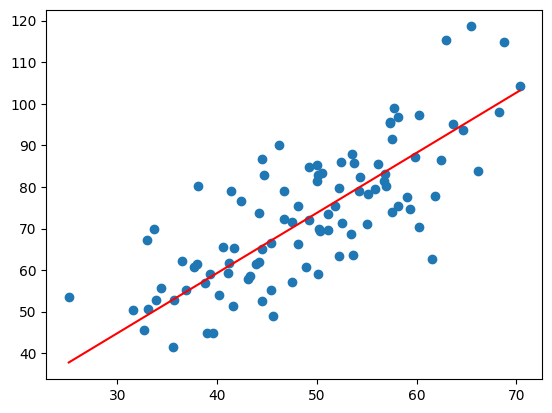

In [10]:
# Your code and answer here
alpha = 0.0001  # The learning Rate
epochs = 1000  # The number of iterations to perform gradient descent
epsilon = 0.0000001
weights = gradient_descent(alpha, epochs, epsilon, X, y)

y_hat = np.dot(PolynomialFeatures(1).fit_transform(X),weights)
plt.scatter(X, Y)
plt.plot([min(X), max(X)], [min(y_hat), max(y_hat)], color='red') # predicted
plt.show()

DECREASING EPSILON

In that case, opposite as the precedent, we need more epochs to find our result. (since it is more difficult to find a delta(norm) < epsilon)

### Exercise 3: Comparison with closed form solution
Use your code from lab 1 or the demo used in the course to implement the closed form solution for linear regression.

In [11]:

# Your code here
class my_linear_regression:
    def __init__(self) : # initialize constructor for the object to assign the object its properties
        self.X_train = []
        self.y_train = []
        self.weights = []
        
    def fit(self, X, y) :
        self.X_train = X
        self.y_train = y
        self.weights = np.linalg.solve(X.T@X,X.T@y)
    
    def predict(self,x_test) : # method of the object that can be used
        self.y_hat=np.sum(x_test*self.weights,axis=1)
        
        return self.y_hat
    
    def MSE(self,y_pred, y_test) :
        MSE = np.mean((y_test - y_pred)**2) 
        return MSE
    

lin_reg_closed = my_linear_regression()
lin_reg_closed.fit(PolynomialFeatures(1).fit_transform(X),Y)
y_hat_closed = lin_reg_closed.predict(PolynomialFeatures(1).fit_transform(X))
print(lin_reg_closed.weights)




[9.90860619 1.28735737]


### Question 2: Comparison
What are the differences between the results obtained with gradient descent and with the closed form solution.

Epoch  0  weights:  [[0.]
 [0.]] gradient_norm:  7570.634235910889
Epoch  1  weights:  [[0.00764711]
 [0.00764711]] gradient_norm:  7530.797393250922
Epoch  2  weights:  [[0.01525397]
 [0.01525397]] gradient_norm:  7491.170172926896
Epoch  3  weights:  [[0.02282081]
 [0.02282081]] gradient_norm:  7451.75147190151
Epoch  4  weights:  [[0.03034783]
 [0.03034783]] gradient_norm:  7412.540192941655
Epoch  5  weights:  [[0.03783525]
 [0.03783525]] gradient_norm:  7373.535244587894
Epoch  6  weights:  [[0.04528326]
 [0.04528326]] gradient_norm:  7334.735541124076
Epoch  7  weights:  [[0.05269209]
 [0.05269209]] gradient_norm:  7296.140002547103
Epoch  8  weights:  [[0.06006192]
 [0.06006192]] gradient_norm:  7257.747554536886
Epoch  9  weights:  [[0.06739298]
 [0.06739298]] gradient_norm:  7219.557128426429
Epoch  10  weights:  [[0.07468546]
 [0.07468546]] gradient_norm:  7181.567661172081
Epoch  11  weights:  [[0.08193957]
 [0.08193957]] gradient_norm:  7143.778095323955
Epoch  12  weights:

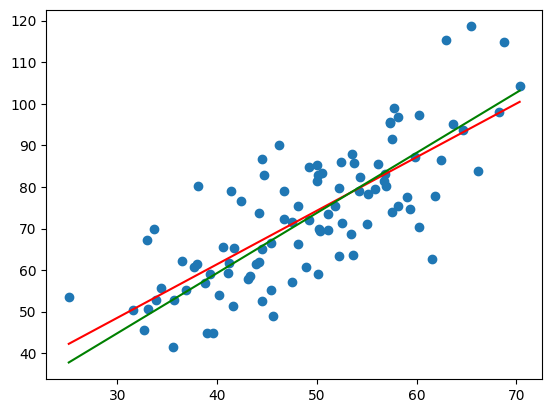

CLOSED:
[9.90860619 1.28735737]
107.47043700950906
GRAD:
[[1.44583276]
 [1.44583276]]
110.2460461305396


In [12]:

#run again values for gradient version
alpha = 0.0001  # The learning Rate
epochs = 1000  # The number of iterations to perform gradient descent
weights = gradient_descent(alpha, epochs, 0.00001, X, y)
y_hat = np.dot(PolynomialFeatures(1).fit_transform(X),weights)

plt.scatter(X, Y)
plt.plot([min(X), max(X)], [min(y_hat_closed), max(y_hat_closed)], color='red') # predicted
plt.plot([min(X), max(X)], [min(y_hat), max(y_hat)], color='green') # predicted
plt.show()

print("CLOSED:") 
print(lin_reg_closed.weights)
print(lin_reg_closed.MSE(y_hat_closed, lin_reg_closed.y_train))

print("GRAD:") 
print(weights)
MSE = np.mean((y - y_hat)**2) 
print(MSE)


### Bonus
Implement gradient descent using mini-batch and stochastic gradient descent.

Epoch  0  weights:  [[0.]
 [0.]] gradient_norm:  7653.1631736109475
Epoch  1  weights:  [[0.76531632]
 [0.76531632]] gradient_norm:  4064.5367510006895
Epoch  2  weights:  [[1.17176999]
 [1.17176999]] gradient_norm:  1118.5986886873422
Epoch  3  weights:  [[1.28362986]
 [1.28362986]] gradient_norm:  1246.1152753925226
Epoch  4  weights:  [[1.40824139]
 [1.40824139]] gradient_norm:  290.209257816367
Epoch  5  weights:  [[1.43726231]
 [1.43726231]] gradient_norm:  209.24302021174083
Epoch  6  weights:  [[1.45818662]
 [1.45818662]] gradient_norm:  133.9287380904941
Epoch  7  weights:  [[1.47157949]
 [1.47157949]] gradient_norm:  275.6016854296592
Epoch  8  weights:  [[1.44401932]
 [1.44401932]] gradient_norm:  405.5974882221635
Epoch  9  weights:  [[1.40345957]
 [1.40345957]] gradient_norm:  94.93266011449383
Epoch  10  weights:  [[1.41295284]
 [1.41295284]] gradient_norm:  679.5494728879426
Epoch  11  weights:  [[1.48090779]
 [1.48090779]] gradient_norm:  233.35128601007
Epoch  12  weigh

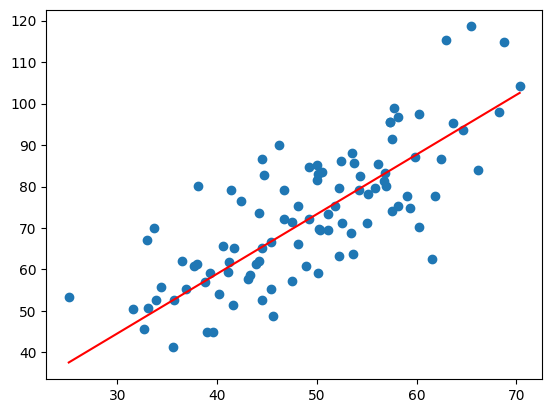

weights
[[1.43773958]
 [1.43773958]]
MSE:
110.72994559263527


In [13]:
def mini_batch_gradient_descent(alpha, epochs, epsilon, X, y, M):
    '''
    Performs gradient descent
    Inputs:
    alpha - learning rate
    epochs - number of iterations
    epsilon - threshold to stop iterations
    X - Input matrix of size N x (D + 1)
    y - Output vector of size N x 1

    Outputs:
    weights - Parameters vector of size (D + 1) x 1
    '''
  
    #Initialize weights
    weights = np.zeros((X.shape[1]+1,1))

    inv_M = float(1/M)
    prev_gradient = 0
    X = PolynomialFeatures(1).fit_transform(X)

    for e in range(epochs):
        rang = np.random.choice(np.arange(X.shape[0]), M)
        X_random = X[rang, :].reshape((-1, X.shape[1]))
        y_random = y[rang, :]

        #1) Estimate y_hat
        y_hat = np.dot(X_random,weights).reshape((-1, 1))
        
        #2) Estimate the gradient
        gradient = - 2 * inv_M * np.sum(np.dot(X_random.T , (y_hat - y_random)))
        gradient_norm = np.linalg.norm(gradient)
        
        print ('Epoch ', e, ' weights: ', weights, 'gradient_norm: ', gradient_norm) 
        
        #3) Check the stopping criterion
        if np.abs(gradient_norm - prev_gradient) <= epsilon:
            break
            
        #4) Update weights
        weights = weights + alpha * gradient
        
        #5) Update previous gradient
        prev_gradient = gradient_norm
        
    return weights

# We will use some dummy data
data = pd.read_csv('data/data.csv')
X = data.iloc[:, 0]
Y = data.iloc[:, 1]

#Use a friendly format for X and y
X = X.to_numpy().reshape(-1,1)
y = Y.to_numpy().reshape(-1,1)

alpha = 0.0001  # The learning Rate
epochs = 1000  # The number of iterations to perform gradient descent
weights = mini_batch_gradient_descent(alpha, epochs, 0.00001, X, y, 10)
y_hat = np.dot(PolynomialFeatures(1).fit_transform(X),weights)

plt.scatter(X, Y)
plt.plot([min(X), max(X)], [min(y_hat), max(y_hat)], color='red') # predicted
plt.show()

print("weights")
print(weights)

MSE = np.mean((y - y_hat)**2) 
print("MSE:") 
print(MSE)

Epoch  0  weights:  [[0.]
 [0.]] gradient_norm:  8318.0262338045
Epoch  1  weights:  [[0.01592839]
 [0.8316501 ]] gradient_norm:  5614.552071688077
Epoch  2  weights:  [[0.02414561]
 [1.39304517]] gradient_norm:  838.6708367860629
Epoch  3  weights:  [[0.02226378]
 [1.3091992 ]] gradient_norm:  549.9470671527552
Epoch  4  weights:  [[0.020874  ]
 [1.25422206]] gradient_norm:  365.54815491375194
Epoch  5  weights:  [[0.02171764]
 [1.29076714]] gradient_norm:  1298.51059414815
Epoch  6  weights:  [[0.02372415]
 [1.4206027 ]] gradient_norm:  387.38138827641797
Epoch  7  weights:  [[0.02453992]
 [1.45933224]] gradient_norm:  1619.8640823219982
Epoch  8  weights:  [[0.0209899 ]
 [1.29738474]] gradient_norm:  338.2602270380092
Epoch  9  weights:  [[0.02003924]
 [1.26357208]] gradient_norm:  217.90518314324342
Epoch  10  weights:  [[0.0204138 ]
 [1.28535938]] gradient_norm:  172.0325338065741
Epoch  11  weights:  [[0.02000014]
 [1.2681611 ]] gradient_norm:  1075.0748050286234
Epoch  12  weigh

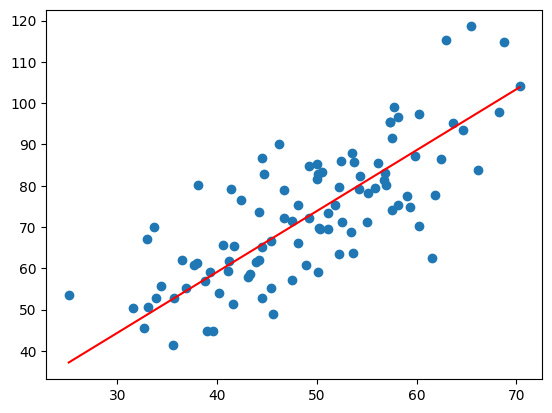

weights
[[0.11234667]
 [1.47497358]]
MSE:
111.05292710680901


In [14]:
def stochastic_gradient_descent(alpha, epochs, epsilon, X, y):
    '''
    Performs gradient descent
    Inputs:
    alpha - learning rate
    epochs - number of iterations
    epsilon - threshold to stop iterations
    X - Input matrix of size N x (D + 1)
    y - Output vector of size N x 1

    Outputs:
    weights - Parameters vector of size (D + 1) x 1
    '''
  
    #Initialize weights
    weights = np.zeros((X.shape[1]+1,1))
    #Adds a one to the matrix so it copes with w_0
    N = len(X)
    prev_gradient = 0
    X = PolynomialFeatures(1).fit_transform(X)
    for e in range(epochs):
        
        
        #2) Estimate the gradient
        random_i = int(np.random.randint(N)) 
        random_X_i = X[random_i, :]
        random_X_i = random_X_i.reshape((-1, X.shape[1]))
        random_y = y[random_i, :]
        
        
        #1) Estimate y_hat
        y_hat = np.dot(random_X_i, weights).reshape((-1, 1))
        
        gradient = 2 * (np.dot(random_X_i.T , (y_hat - random_y)))
        gradient_norm = np.linalg.norm(gradient)
        
        
        print ('Epoch ', e, ' weights: ', weights, 'gradient_norm: ', gradient_norm) 
        
        #3) Check the stopping criterion
        if np.abs(gradient_norm - prev_gradient) <= epsilon:
            break
            
        #4) Update weights
        weights = weights - alpha * gradient
        #print ("Weights shapwe", weights.shape)
        
        #5) Update previous gradient
        prev_gradient = gradient_norm
        
    return weights

# We will use some dummy data
data = pd.read_csv('data/data.csv')
X = data.iloc[:, 0]
Y = data.iloc[:, 1]

#Use a friendly format for X and y
X = X.to_numpy().reshape(-1,1)
y = Y.to_numpy().reshape(-1,1)

alpha = 0.0001  # The learning Rate
epochs = 1000  # The number of iterations to perform gradient descent
weights = stochastic_gradient_descent(alpha, epochs, 0.00001, X, y)
y_hat = np.dot(PolynomialFeatures(1).fit_transform(X),weights)

plt.scatter(X, Y)
plt.plot([min(X), max(X)], [min(y_hat), max(y_hat)], color='red') # predicted
plt.show()

print("weights")
print(weights)

MSE = np.mean((y - y_hat)**2) 
print("MSE:") 
print(MSE)